# Early Disease Detection

### 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

### 2. Reading from the file and getting information

In [29]:
df=pd.read_csv('edd_fin.csv')
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease_type
0,28-01-2022,Indonesia,63855,1,19760,0,110,70,1,2,1,172,Teacher,0,96.0,Healthy / Low Risk
1,22-05-2021,Singapore,76455,1,19063,0,140,80,1,2,2,170,Chef,0,80.0,Hypertension
2,10-10-2018,India,6163,1,22772,0,120,80,3,2,3,165,Teacher,0,65.0,Cardiovascular Disease
3,12-10-2020,Singapore,40057,1,17573,0,120,80,1,1,1,150,Doctor,0,56.0,Borderline Hypertension
4,10-08-2019,India,60595,1,16161,0,115,80,2,1,2,158,Accountant,1,78.0,Prediabetes


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80505 entries, 0 to 80504
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          80505 non-null  object 
 1   country       80505 non-null  object 
 2   id            80505 non-null  int64  
 3   active        80505 non-null  int64  
 4   age           80505 non-null  int64  
 5   alco          80505 non-null  int64  
 6   ap_hi         80505 non-null  int64  
 7   ap_lo         80505 non-null  int64  
 8   cholesterol   80505 non-null  int64  
 9   gender        80505 non-null  int64  
 10  gluc          80505 non-null  int64  
 11  height        80505 non-null  int64  
 12  occupation    80505 non-null  object 
 13  smoke         80505 non-null  int64  
 14  weight        80505 non-null  float64
 15  disease_type  80505 non-null  object 
dtypes: float64(1), int64(11), object(4)
memory usage: 9.8+ MB


In [31]:
df.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight
count,80505.000000,80505.000000,80505.000000,80505.000000,80505.000000,80505.000000,80505.000000,80505.000000,80505.000000,80505.000000,80505.000000,80505.000000
mean,49878.595491,0.811242,19279.297981,0.060307,123.608968,89.952475,1.403254,1.343171,1.355419,164.216533,0.099211,72.860551
std,28742.987460,0.391319,2494.344297,0.238056,126.395533,183.535483,0.679102,0.474771,0.697408,8.168648,0.298947,14.143540
min,0.000000,0.000000,10859.000000,0.000000,-150.000000,0.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000
25%,24864.000000,1.000000,17478.000000,0.000000,110.000000,70.000000,1.000000,1.000000,1.000000,159.000000,0.000000,63.000000
50%,50131.000000,1.000000,19590.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,164.000000,0.000000,70.000000
75%,74522.000000,1.000000,21222.000000,0.000000,130.000000,80.000000,2.000000,2.000000,1.000000,169.000000,0.000000,80.000000
max,99999.000000,1.000000,23713.000000,1.000000,14020.000000,10000.000000,3.000000,2.000000,3.000000,207.000000,1.000000,200.000000


### 3. Data Preprocessing

In [32]:
#Checking for Null values
df.isnull().sum()

date            0
country         0
id              0
active          0
age             0
alco            0
ap_hi           0
ap_lo           0
cholesterol     0
gender          0
gluc            0
height          0
occupation      0
smoke           0
weight          0
disease_type    0
dtype: int64

In [33]:
#Encode categorical variables
label_encoders = {}
for column in ['country','occupation','disease_type']:
    le=LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Assuming 'age' values are in days, divide by 365.25 for a more accurate conversion
df['age'] = (df['age'] / 365.25).round().astype(int)

### 4. Visualization

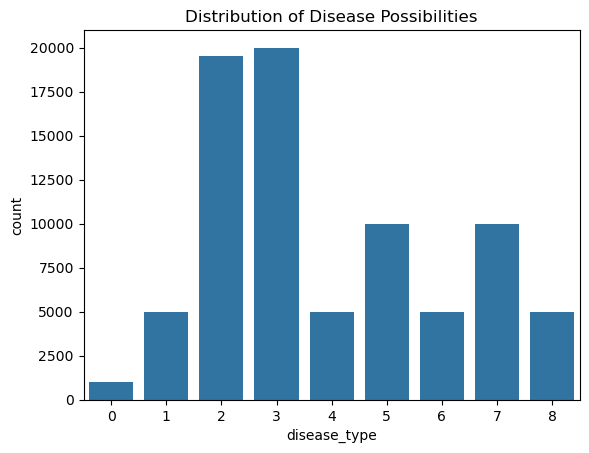

In [34]:
#Countplot
sns.countplot(x='disease_type',data=df)
plt.title('Distribution of Disease Possibilities')
plt.show()

### 5. Selecting features and target, splitting into training and testing sets and feature scaling

In [35]:
#Features and target
x=df.drop(['id','disease_type','date','country','occupation'],axis=1)
y=df['disease_type']

#Split data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

#Feature scaling
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### 6. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(max_iter=1000)
logreg.fit(x_train,y_train)
logreg_pred=logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test,logreg_pred)

### 6(a). Displaying Accuracy and Performance Metrics of Logistic Regression Model

In [39]:
print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}')
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test,logreg_pred))

Logistic Regression Accuracy: 71.65

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       283
           1       0.92      1.00      0.96      1477
           2       0.70      0.88      0.78      5833
           3       0.51      0.56      0.54      6052
           4       0.92      0.99      0.95      1458
           5       0.87      0.95      0.91      3001
           6       0.78      0.96      0.86      1517
           7       0.53      0.07      0.12      2950
           8       0.91      0.68      0.78      1581

    accuracy                           0.72     24152
   macro avg       0.78      0.77      0.75     24152
weighted avg       0.70      0.72      0.68     24152



### 7. KNN (K-Nearest-Neighbour) Algorithm

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

### 7(a). Display Accuracy and Performance Metrics of KNN Model

In [41]:
print(f'K-Nearest Neighbors Accuracy:{knn_accuracy*100:.2f}')
print('\nK-Nearest Neighbors Classification Report:')
print(classification_report(y_test, knn_pred))

K-Nearest Neighbors Accuracy:63.86

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       283
           1       0.77      0.98      0.86      1477
           2       0.53      0.69      0.60      5833
           3       0.55      0.37      0.44      6052
           4       0.90      0.99      0.94      1458
           5       0.71      0.64      0.67      3001
           6       0.72      0.89      0.80      1517
           7       0.54      0.45      0.49      2950
           8       0.81      0.89      0.85      1581

    accuracy                           0.64     24152
   macro avg       0.71      0.77      0.73     24152
weighted avg       0.63      0.64      0.63     24152



### 7(b). Plotting Confusion Matrix for KNN Model

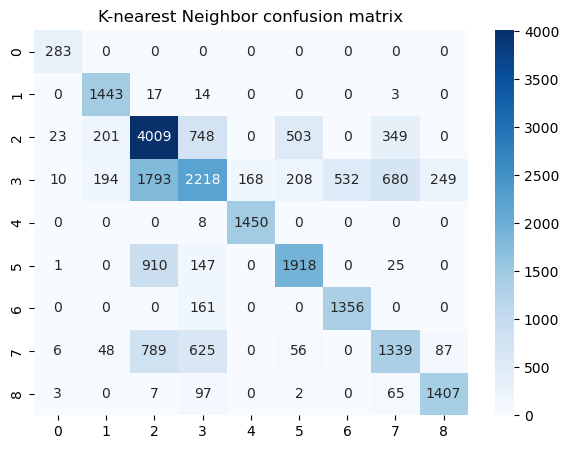

In [42]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot =True, fmt='d', cmap='Blues')
plt.title('K-nearest Neighbor confusion matrix')
plt.show()

### 8. Decision trees

In [43]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
decision_tree_pred=decision_tree.predict(x_test)
decision_tree_accuracy=accuracy_score(y_test, decision_tree_pred)

### 8(a). Display Accuracy and Performance Metrics of Decision Tree Model

In [45]:
print(f'Decision tree accuracy: {decision_tree_accuracy*100:.2f}')
print('\nDecision Tree Classification Report:')
print(classification_report(y_test, decision_tree_pred))

Decision tree accuracy: 81.74

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       0.98      1.00      0.99      1477
           2       0.79      0.79      0.79      5833
           3       0.66      0.57      0.61      6052
           4       0.96      1.00      0.98      1458
           5       0.94      0.96      0.95      3001
           6       0.88      0.97      0.93      1517
           7       0.76      0.89      0.82      2950
           8       0.94      0.96      0.95      1581

    accuracy                           0.82     24152
   macro avg       0.88      0.90      0.89     24152
weighted avg       0.81      0.82      0.81     24152



### 8(b). Plotting Confusion Matrix for Decision Tree Model

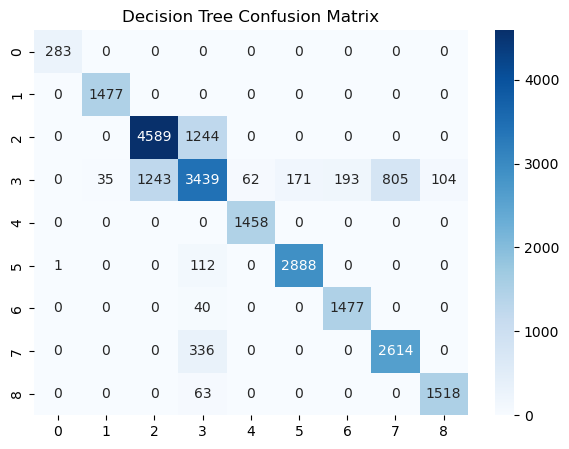

In [46]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, decision_tree_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

### 9. Support Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train, y_train)
svm_pred=svm.predict(x_test)
svm_accuracy=accuracy_score(y_test, svm_pred)

### 9(a). Display Accuracy and Performance Metrics of Support Vector Machine Model

In [48]:
print(f'SVM accuracy: {svm_accuracy*100:.2f}')
print('\nSVM Classification Report:')
print(classification_report(y_test, svm_pred))

SVM accuracy: 70.29

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       283
           1       0.72      1.00      0.84      1477
           2       0.66      0.83      0.73      5833
           3       0.58      0.52      0.55      6052
           4       0.88      1.00      0.94      1458
           5       0.82      0.92      0.87      3001
           6       0.77      0.88      0.82      1517
           7       0.58      0.04      0.07      2950
           8       0.76      0.99      0.86      1581

    accuracy                           0.70     24152
   macro avg       0.73      0.80      0.73     24152
weighted avg       0.68      0.70      0.66     24152



### 9(b). Plotting Confusion Matrix for Support Vector Machine Model

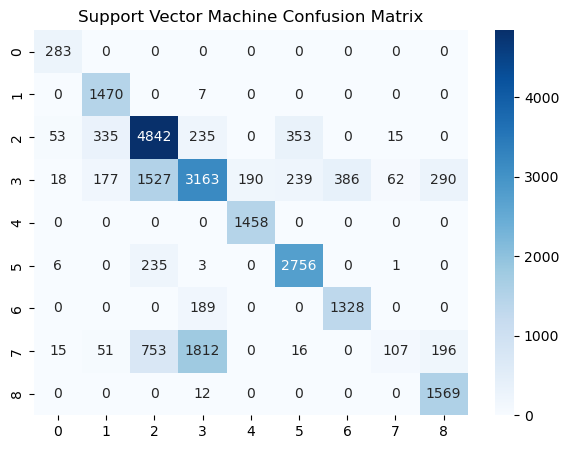

In [49]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,svm_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

### 10. Checking all the model accuracies

In [50]:
model_accuracies = {
    'Logistic Regression': logreg_accuracy,
    'K-Nearest Neighbors': knn_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Support Vector Machine': svm_accuracy,
}

#Display accuracies
for model, accuracy in model_accuracies.items():
    print(f'{model} Accuracy: {accuracy*100:.2f}%')

Logistic Regression Accuracy: 71.65%
K-Nearest Neighbors Accuracy: 63.86%
Decision Tree Accuracy: 81.74%
Support Vector Machine Accuracy: 70.29%


### 11. Predicitng Disease Type for New User through User Input

In [25]:
# Mapping from label encoder to disease type according to the given database
disease_labels = {
    0: "At Risk (Age, Smoking, Alcohol)",
    1: "Borderline High Cholesterol",
    2: "Borderline Hypertension",
    3: "Cardiovascular Disease",
    4: "Diabetes",
    5: "Healthy/Low Risk",
    6: "High Cholesterol",
    7: "Hypertension",
    8: "Prediabetes"
}

def predict_disease():
    print("Please enter the following details:")
    active = int(input("Active (0/1): "))
    age = int(input("Age (years): "))
    alco = int(input("Alcohol consumption (0/1): "))
    ap_hi = int(input("Systolic BP (ap_hi): "))
    ap_lo = int(input("Diastolic BP (ap_lo): "))
    cholesterol = int(input("Cholesterol (1-normal, 2-above normal, 3-well above normal): "))
    gender = int(input("Gender (1-male, 2-female): "))
    gluc = int(input("Glucose (1-normal, 2-above normal, 3-well above normal): "))
    height = int(input("Height (cm): "))
    smoke = int(input("Smoke (0/1): "))
    weight = int(input("Weight (kg): "))

    # Arrange input as a 2D array
    user_data = np.array([[active, age, alco, ap_hi, ap_lo, cholesterol, gender, gluc, height, smoke, weight]])
    prediction = logreg.predict(user_data)
    disease_type = disease_labels.get(prediction[0], "Unknown Disease Type")
    print(f"According to the entered information, the person is prone/likely to have: {disease_type}")

In [51]:
predict_disease()

Please enter the following details:


Active (0/1):  0
Age (years):  90
Alcohol consumption (0/1):  0
Systolic BP (ap_hi):  200
Diastolic BP (ap_lo):  150
Cholesterol (1-normal, 2-above normal, 3-well above normal):  2
Gender (1-male, 2-female):  1
Glucose (1-normal, 2-above normal, 3-well above normal):  2
Height (cm):  190
Smoke (0/1):  0
Weight (kg):  80


According to the entered information, the person is prone/likely to have: Cardiovascular Disease
